In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from scipy.stats import ttest_ind, ttest_1samp
import warnings
warnings.filterwarnings('ignore')

#set precision for displaying float-point values in the notebook
pd.options.display.float_format = '{:,.3f}'.format

#set figure dpi to 100 to get reasonably sized figures displayed in the notebook
plt.rc('figure', dpi=100)

#set savefig dpi to 300 to get high-quality images to insert in the paper
plt.rc('savefig', dpi=300)

#set to 'pdf' or 'eps' for vector figures or to 'png'
plt.rc('savefig', format='png')

# despine plots by default
plt.rc("axes.spines", top=False, right=False)

#set font sizes for figures throughout
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=20, titlesize=22)
plt.rc('legend', fontsize=16)

# color palette for sequential data
palette_sqn = 'viridis_r'

# color palette for participant IDs
palette_subj = 'magma_r'

In [3]:
import data_reader, data_analyser, trajectory_plotter
dr = data_reader.DataReader()

index = ['subj_id', 'session_no', 'block_no', 'trial_no']

exp_1, exp_2 = 'Exp 1', 'Exp 2'
choices_1, dynamics_1 = dr.get_data(path='../../data/HEM_exp_1/processed/', rename_vars=True)
choices_2, dynamics_2 = dr.get_data(path='../../data/HEM_exp_2/processed/', rename_vars=True)

# for initiation time analysis, we exclude trials with IT > 1.5 sec
IT_threshold = 1.5
choices_1 = choices_1[(choices_1['mouse IT']<IT_threshold) & (choices_1['eye IT']<IT_threshold)]
choices_2 = choices_2[(choices_2['mouse IT']<IT_threshold) & (choices_2['eye IT']<IT_threshold)]

In [7]:
choices=choices_2

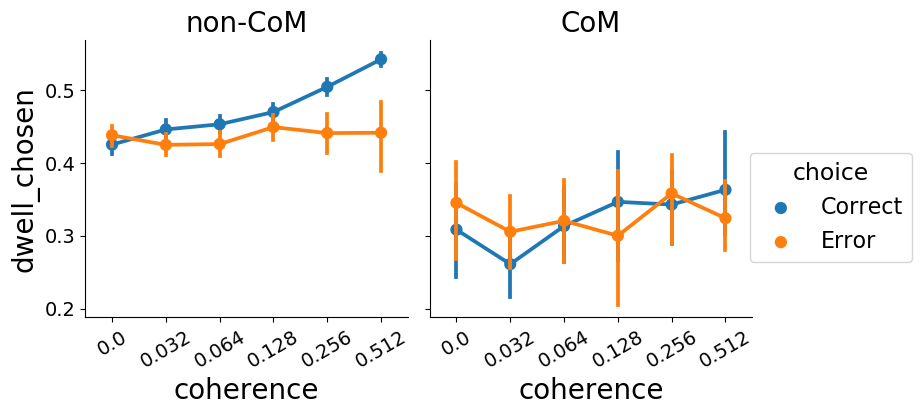

In [9]:
fig = sns.factorplot(data=choices, x='coherence', y='dwell_chosen', hue='choice', col='type')
fig.set_xticklabels(rotation=30)
fig.set_titles('{col_name}')

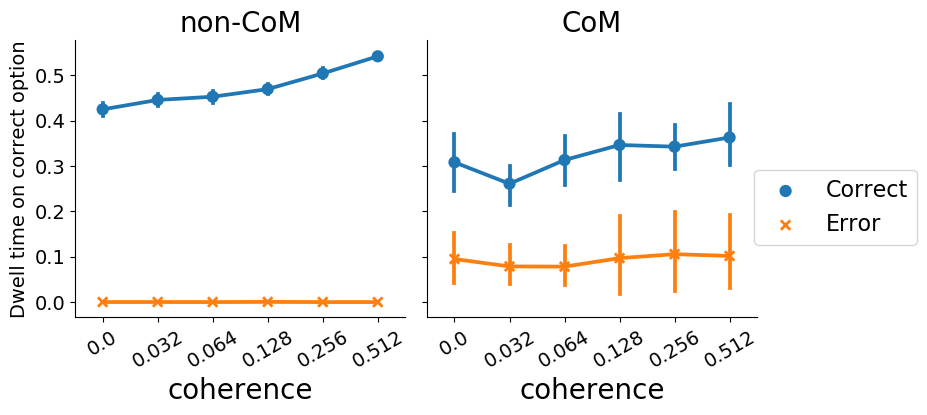

In [46]:
fig = sns.factorplot(data=choices, x='coherence', y='dwell_correct', hue='choice', col='type', markers=['o', 'x'])
fig.axes[0][0].set_ylabel('Dwell time on correct option', fontsize=14)
fig.set_xticklabels(rotation=30)
fig.set_titles('{col_name}')
fig._legend.set_title('')
# sns.despine(trim=True, offset=10)

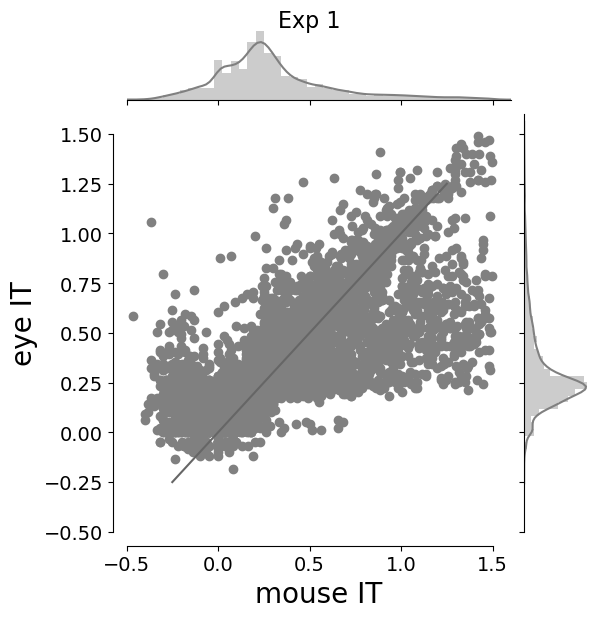

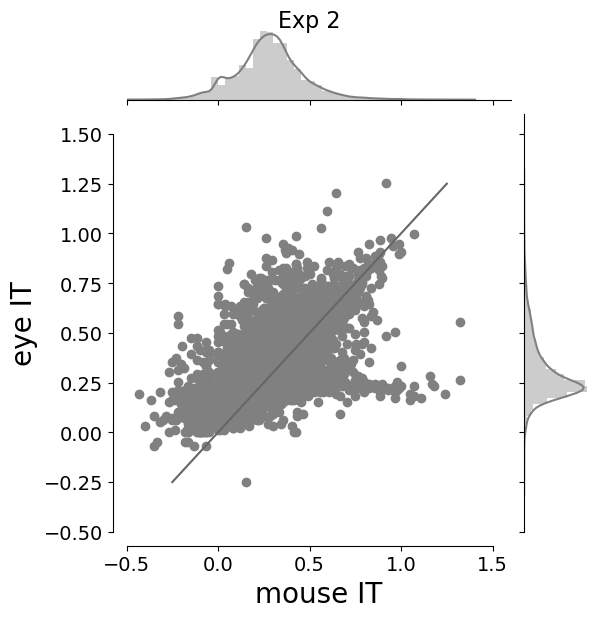

In [35]:
def plot_IT_joint(choices, exp):
    g = sns.jointplot(data=choices, x='mouse IT', y='eye IT', stat_func=None, color='0.5',
                      marginal_kws=dict(kde=True, hist=True), xlim=(-0.5,1.6), ylim=(-0.5,1.6))
    x_grid = np.linspace(-0.25, 1.25, 10)
    g.ax_joint.plot(x_grid,x_grid, color='0.4')
#     g.ax_joint.set_yticks(g.ax_joint.get_xticks())
    sns.despine(ax=g.ax_joint, trim=True, offset=10)
    plt.suptitle(exp, fontsize=16, y=1.0)
    g.savefig('figures/IT_joint_%s.png' % (exp)) 
    
plot_IT_joint(choices_1, exp_1)
plot_IT_joint(choices_2, exp_2)